In [2]:
# This cell taken from https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0 
!pip install kaggle
!mkdir .kaggle
import json
token = {"username":"buchertn","key":"7fb3fc044911b1895b73d7e97e67427a"} 
with open('/content/.kaggle/kaggle.json', 'w') as file:
  json.dump(token, file)
!chmod 600 /content/.kaggle/kaggle.json
!cp /content/.kaggle/kaggle.json /root/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!kaggle datasets download -d buchertn/minne-mudac -p /content
!unzip \*.zip

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
  0% 0.00/530k [00:00<?, ?B/s]
100% 530k/530k [00:00<00:00, 35.1MB/s]
Archive:  minne-mudac.zip
  inflating: modified_realmonthlycommodityexchangerates_1_.xlsx  


In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_excel('modified_realmonthlycommodityexchangerates_1_.xlsx')

regr = linear_model.LinearRegression()
x = data['Hides & Skins'].values.reshape(-1, 1)
y = data['Soybeans'].values.reshape(-1,1)
regr.fit(x, y)

print('Coefficients: {}, Intercept: {}'.format(regr.coef_, regr.intercept_))


Coefficients: [[1.248068]], Intercept: [-22.53247868]


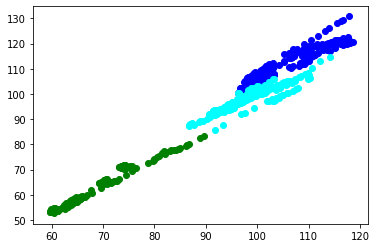

In [0]:
import itertools

import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.mixture import GaussianMixture

from sklearn import mixture

data = pd.read_excel('modified_realmonthlycommodityexchangerates_1_.xlsx')

X = data[['Hides & Skins', 'Soybeans']]
X.shape
	
gmm = GaussianMixture(n_components=3,covariance_type='tied',random_state=1234)
gmm.fit(X)

#predictions from gmm
labels = gmm.predict(X)
frame = pd.DataFrame(X)
frame['cluster'] = labels
frame.columns = ['Hides & Skins', 'Soybeans', 'cluster']
saved_data = X

color=['blue','green','cyan', 'black','orange','pink']
for k in range(0,3):
    X = frame[frame["cluster"]==k]
    plt.scatter(X['Hides & Skins'],X['Soybeans'],c=color[k])
plt.show()

Text(0, 0.5, 'Feature 1')

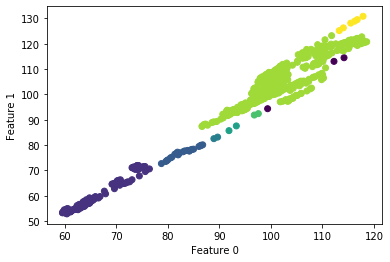

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data[['Hides & Skins', 'Soybeans']].values
X_scaled = scaler.fit_transform(X)# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# clusters

In [0]:
saved_data['Year'] = data.Year
saved_data['Month'] = data.Month
from google.colab import drive
drive.mount('/content/drive/')
#saved_data.to_csv('/content/drive/My Drive/MinneMUDAC/clusters.xlsx')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
